In [22]:
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv("airline-passengers.csv")

In [24]:
data = data["Passengers"].values

In [25]:
data

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432])

In [ ]:
# Prepare the data

In [26]:
def create_data(data, timeperiod):
    X = []
    y = []
    for i in range(len(data)-timeperiod-1):
        X.append(data[i:(i+timeperiod)-1])
        y.append(data[(i+timeperiod)-1])
    return X, y

In [27]:
X, y = create_data(data = data, timeperiod=3)

In [28]:
X

[array([112, 118]),
 array([118, 132]),
 array([132, 129]),
 array([129, 121]),
 array([121, 135]),
 array([135, 148]),
 array([148, 148]),
 array([148, 136]),
 array([136, 119]),
 array([119, 104]),
 array([104, 118]),
 array([118, 115]),
 array([115, 126]),
 array([126, 141]),
 array([141, 135]),
 array([135, 125]),
 array([125, 149]),
 array([149, 170]),
 array([170, 170]),
 array([170, 158]),
 array([158, 133]),
 array([133, 114]),
 array([114, 140]),
 array([140, 145]),
 array([145, 150]),
 array([150, 178]),
 array([178, 163]),
 array([163, 172]),
 array([172, 178]),
 array([178, 199]),
 array([199, 199]),
 array([199, 184]),
 array([184, 162]),
 array([162, 146]),
 array([146, 166]),
 array([166, 171]),
 array([171, 180]),
 array([180, 193]),
 array([193, 181]),
 array([181, 183]),
 array([183, 218]),
 array([218, 230]),
 array([230, 242]),
 array([242, 209]),
 array([209, 191]),
 array([191, 172]),
 array([172, 194]),
 array([194, 196]),
 array([196, 196]),
 array([196, 236]),


In [29]:
y

[132,
 129,
 121,
 135,
 148,
 148,
 136,
 119,
 104,
 118,
 115,
 126,
 141,
 135,
 125,
 149,
 170,
 170,
 158,
 133,
 114,
 140,
 145,
 150,
 178,
 163,
 172,
 178,
 199,
 199,
 184,
 162,
 146,
 166,
 171,
 180,
 193,
 181,
 183,
 218,
 230,
 242,
 209,
 191,
 172,
 194,
 196,
 196,
 236,
 235,
 229,
 243,
 264,
 272,
 237,
 211,
 180,
 201,
 204,
 188,
 235,
 227,
 234,
 264,
 302,
 293,
 259,
 229,
 203,
 229,
 242,
 233,
 267,
 269,
 270,
 315,
 364,
 347,
 312,
 274,
 237,
 278,
 284,
 277,
 317,
 313,
 318,
 374,
 413,
 405,
 355,
 306,
 271,
 306,
 315,
 301,
 356,
 348,
 355,
 422,
 465,
 467,
 404,
 347,
 305,
 336,
 340,
 318,
 362,
 348,
 363,
 435,
 491,
 505,
 404,
 359,
 310,
 337,
 360,
 342,
 406,
 396,
 420,
 472,
 548,
 559,
 463,
 407,
 362,
 405,
 417,
 391,
 419,
 461,
 472,
 535,
 622,
 606,
 508,
 461]

In [30]:
X = np.array(X)
y = np.array(y)

In [ ]:
# Train Test Split

In [31]:
train_size = 0.7
cut = round(train_size*len(X))

trainX = X[:cut].reshape(-1,1,2)
testX = X[cut:].reshape(-1,1,2)

trainy = y[:cut]
testy = y[cut:]

In [32]:
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(98, 1, 2)
(98,)
(42, 1, 2)
(42,)


In [33]:
testy.shape

(42,)

In [ ]:
# Model Building

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [35]:
model = Sequential()
model.add(LSTM(5, activation="relu", input_shape=(1,2)))
model.add(Dense(3, "relu")) # Output layer
model.add(Dense(1)) # Output layer

In [36]:
model.compile(optimizer = Adam(learning_rate=0.1), loss="mean_squared_error")

In [37]:
model.fit(x=trainX, y= trainy, epochs = 100, batch_size=50, validation_data=(testX, testy))

Epoch 1/100
2/2 [==============================] - 2s 302ms/step - loss: 53928.0508 - val_loss: 183630.2812
Epoch 2/100
2/2 [==============================] - 0s 36ms/step - loss: 53840.0195 - val_loss: 183462.0000
Epoch 3/100
2/2 [==============================] - 0s 47ms/step - loss: 53750.5312 - val_loss: 183293.9219
Epoch 4/100
2/2 [==============================] - 0s 54ms/step - loss: 53663.8047 - val_loss: 183125.6875
Epoch 5/100
2/2 [==============================] - 0s 65ms/step - loss: 53574.7461 - val_loss: 182957.7344
Epoch 6/100
2/2 [==============================] - 0s 37ms/step - loss: 53487.8359 - val_loss: 182789.6719
Epoch 7/100
2/2 [==============================] - 0s 39ms/step - loss: 53402.1172 - val_loss: 182621.4531
Epoch 8/100
2/2 [==============================] - 0s 39ms/step - loss: 53312.1719 - val_loss: 182453.9219
Epoch 9/100
2/2 [==============================] - 0s 45ms/step - loss: 53224.5391 - val_loss: 182286.5000
Epoch 10/100
2/2 [==================

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 5)                 160       
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 182
Trainable params: 182
Non-trainable params: 0
_________________________________________________________________


In [39]:
finalX, finalY = create_data(data, timeperiod=3)

In [40]:
preds = model.predict(np.array(finalX).reshape(-1,1,2))

5/5 [==============================] - 0s 3ms/step


In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

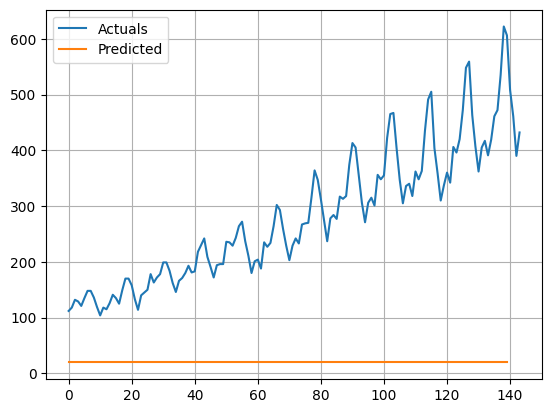

In [42]:
plt.plot(data)
plt.plot(preds)
plt.legend(["Actuals", "Predicted"])
plt.grid()
plt.show()